In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 호출
df1_2020 = pd.read_csv('./data/한국전력공사_전기차충전소충전량(202001_202006).csv', encoding='cp949')
df2_2020 = pd.read_csv('./data/한국전력공사_전기차충전소충전량(202007_202012).csv', encoding='cp949')

# 2020년 데이터 합치기
df_2020 = pd.concat([df1_2020, df2_2020])


In [51]:
# 데이터 확인
df_2020

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,서울,마포용산,용산역 아이파크몰,급속04,723,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50.0,22.31,0,34,2020-01-01,2020-01-01 21:33:00,2020-01-01 22:07:00
1,경기,경기직할,영통공영주차장,급속02,1184,경기도 수원시 영통구 봉영로 1598,급속,50.0,32.85,1,31,2020-01-01,2020-01-01 20:40:00,2020-01-01 22:11:00
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,8462,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00
3,경기북부,경기북부직할,양주자이2단지 아파트,완속02,2196,경기도 양주시 삼숭동 삼숭로38번길 78-12,완속,7.0,8.50,2,41,2020-01-01,2020-01-01 20:05:00,2020-01-01 22:46:00
4,인천,남인천,서창LH6단지,완속01,5445,인천광역시 남동구 서창남순환로 190-100,완속,7.0,12.70,2,51,2020-01-01,2020-01-01 16:17:00,2020-01-01 19:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008058,경기,서수원,동탄신일유토빌,완속03,7756,경기도 화성시 동탄반석로 232,완속,7.0,18.96,6,10,2020-12-03,2020-12-02 23:04:18,2020-12-03 05:14:56
1008059,인천,서인천,청라롯데캐슬 아파트,완속03,2002,인천광역시 서구 청라커낼로 252,완속,7.0,37.80,5,44,2020-12-03,2020-12-02 23:31:25,2020-12-03 05:16:23
1008060,남서울,강남,타워팰리스G동,완속02,2925,서울특별시 강남구 도곡동 언주로30길 26,완속,7.0,52.16,9,37,2020-12-03,2020-12-02 19:40:13,2020-12-03 05:17:23
1008061,대구,남대구,상인역e편한세상2단지 아파트,완속01,2135,대구광역시 달서구 상인동 월서로3길 15,완속,7.0,39.77,6,22,2020-12-03,2020-12-02 23:02:31,2020-12-03 05:25:01


In [52]:
# 광주광역시의 데이터만 사용하기때문에 주소에 광주광역시를 포함하는 데이터만 추출 및 저장
df1_2020 = df1_2020[df1_2020['주소'].str.contains('광주광역시', na=False)]
df2_2020 = df2_2020[df2_2020['주소'].str.contains('광주광역시', na=False)]

# 광주광역시 데이터 추출 후 2020년 데이터 합치기
df_2020 = pd.concat([df1_2020, df2_2020])



In [53]:
# 데이터 전처리 전 데이터타입 확인
df_2020.info()

# 데이터의 결측값 확인
df_2020.isna().value_counts() # 충전용량 열에서 464개의 결측값 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57272 entries, 2 to 1008049
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   본부      57272 non-null  object 
 1   사업소     57272 non-null  object 
 2   충전소명    57272 non-null  object 
 3   충전기     57272 non-null  object 
 4   충전기ID   57272 non-null  int64  
 5   주소      57272 non-null  object 
 6   충전기구분   57272 non-null  object 
 7   충전용량    56808 non-null  float64
 8   충전량     57272 non-null  float64
 9   충전시간    57272 non-null  int64  
 10  충전분     57272 non-null  int64  
 11  충전종료일자  57272 non-null  object 
 12  충전시작시각  57272 non-null  object 
 13  충전종료시각  57272 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 6.6+ MB


본부     사업소    충전소명   충전기    충전기ID  주소     충전기구분  충전용량   충전량    충전시간   충전분    충전종료일자  충전시작시각  충전종료시각
False  False  False  False  False  False  False  False  False  False  False  False   False   False     56808
                                                 True   False  False  False  False   False   False       464
dtype: int64

In [54]:
## 분리되있던 충전시간과 충전분을 하나의 '시'단위로 만드릭 위한 전처리
# 시간 계산을 위해 충전시작시각과 충전종료시각의 데이터 타입 변경
df_2020['충전시작시각'] = pd.to_datetime(df_2020['충전시작시각'])
df_2020['충전종료시각'] = pd.to_datetime(df_2020['충전종료시각'])

# 종료 - 시작으로 시간을 구하고 '분' 및 '시'로 변경
df_2020['충전시각'] = df_2020['충전종료시각'] - df_2020['충전시작시각']
df_2020['충전시각(분)'] = (df_2020['충전시각'] / np.timedelta64(1, 'm')).astype(int)
df_2020['충전시각(시)'] = (df_2020['충전시각'] / np.timedelta64(1, 'h')).astype(float).round(3)

# 분석에 필요 없는 열 제거
df_2020 = df_2020.drop(['본부', '충전시간', '충전분', '충전종료일자', '충전시각'], axis=1)

In [55]:
## 충전용량의 결측값 처리를 위한 과정

# 충전용량 이상치 판별을 위한 시간당 충전량 계산
df_2020['시간당 충전량'] = df_2020['충전량'] / df_2020['충전시각(시)']

# 충전용량은 충전기에 따라 7, 50, 200으로 구분된다.
# 충전용량의 결측값을 시간당 충전량이 7미만이만 7로, 7이상 50미만이면 50으로 50이상이면 200으로 설정
def set_capacity(row):
    if pd.isna(row['충전용량']):
        if row['시간당 충전량'] < 7:
            return 7
        elif row['시간당 충전량'] >= 7 and row['시간당 충전량'] < 50:
            return 50
        else:
            return 200
    else:
        return row['충전용량']

df_2020['충전용량'] = df_2020.apply(set_capacity, axis=1)


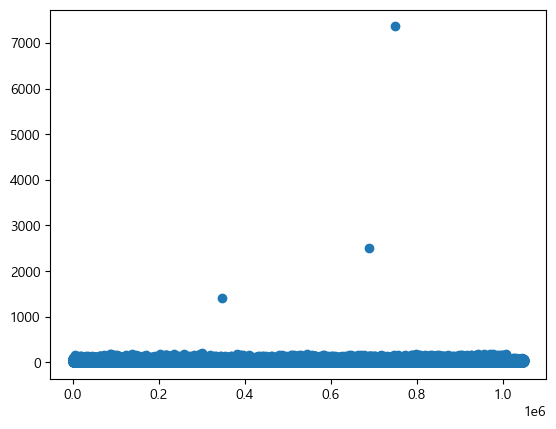

In [56]:
# 충전량 데이터 확인(너무 높은 충전량을 가진 데이터 확인) -> 이상치 제거
plt.scatter(df_2020.index ,df_2020['충전량'])
plt.show()

In [57]:
## 데이터 이상치 제거

# 충전량이 많다고 판단되는 이상치 제거
df_2020.drop(df_2020[df_2020['충전량'] >= 1000].index, inplace=True)

# 충전시각이 5분 이하인 데이터 삭제
df_2020.drop(df_2020[df_2020['충전시각(분)'] <= 5].index, inplace=True)

# 충전용량은 최대 시간당 충전량이므로 (시간당 충전량 > 충전용량)인 데이터는 이상치로 판별하고 제거
df_2020 = df_2020[df_2020['시간당 충전량'] <= df_2020['충전용량']]

In [58]:
## 충전소 위치를 '구'및 '동'으로 구분
# 충전소 위치를 '구'로 구분
df_2020['지역(구)'] = df_2020['주소'].str.split(' ').str[1]

In [59]:
# 주소에서 '동' 추출
df_2020['지역(동)'] = df_2020['주소'].str.split('(').str[1].str.split(',').str[0].str.replace(')','')

C:\Users\SS\AppData\Local\Temp\ipykernel_34596\4247718417.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2020['지역(동)'] = df_2020['주소'].str.split('(').str[1].str.split(',').str[0].str.replace(')','')


In [60]:
# 동 추출시 Nan, 금남로4가로 잘못분류된 데이터가 확인됨
df_2020['지역(동)'].unique() 
# '금남로4가'로 분류된 데이터는 모두 한곳의 장소임을 확인
df_2020[df_2020['지역(동)'] == '금남로4가']['주소'].unique()
## 주소의 동이 아닌 '금남로4가'는 '충장동'으로 변경
df_2020['지역(동)'] = df_2020['지역(동)'].replace('금남로4가', '충장동')

In [61]:
# '동'이 Nan으로 분류된 데이터는 1472건으로 확인
df_2020['지역(동)'].isna().value_counts()
# 원인은 주소에 '동'이 적혀있지 않음
df_2020[df_2020['주소'].str.contains('\(') == False]
df_2020[df_2020['지역(동)'].isna()]

,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시작시각,충전종료시각,충전시각(분),충전시각(시),시간당 충전량,지역(구),지역(동)
778,환경부,롯데마트 상무점,급속01,11002945,"광주광역시 서구 시청로 40, 1층 진입후 우측",급속,50.0,15.660,2020-01-01 18:27:00,2020-01-01 18:51:00,24,0.400,39.150000,서구,NaN
2402,광산,광주송정역(KTX),급속01,34,광주광역시 광산구 상무대로 201,급속,50.0,24.622,2020-01-01 15:52:00,2020-01-01 16:51:00,59,0.983,25.047813,광산구,NaN
5056,서광주,쌍촌동 한국농어촌공사 주차장,급속02,8182,광주광역시 서구 상무대로 956번길 6 한국농어촌공사,급속,50.0,23.170,2020-01-01 03:58:00,2020-01-01 04:33:00,35,0.583,39.742710,서구,NaN
5682,서광주,쌍촌동 한국농어촌공사 주차장,급속01,8181,광주광역시 서구 상무대로 956번길 6 한국농어촌공사,급속,50.0,44.620,2020-01-01 02:14:00,2020-01-01 04:26:00,132,2.200,20.281818,서구,NaN
6921,서광주,쌍촌동 한국농어촌공사 주차장,급속01,8181,광주광역시 서구 상무대로 956번길 6 한국농어촌공사,급속,50.0,15.300,2020-01-02 19:01:00,2020-01-02 19:52:00,51,0.850,18.000000,서구,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999794,서광주,금호5차호반리젠시빌,완속01,7691,광주광역시 서구 화개1로 78번길 8,완속,7.0,20.000,2020-12-01 21:40:47,2020-12-02 00:57:33,196,3.279,6.099421,서구,NaN
1001714,서광주,쌍촌동 한국농어촌공사 주차장,급속02,8182,광주광역시 서구 상무대로 956번길 6 한국농어촌공사,급속,50.0,32.790,2020-12-03 18:24:35,2020-12-03 19:07:17,42,0.712,46.053371,서구,NaN
1001885,환경부,한국광기술원,급속01,11002199,광주광역시 북구 첨단 벤처로 108번길 9,급속,50.0,16.320,2020-12-03 09:28:14,2020-12-03 09:52:02,23,0.397,41.108312,북구,NaN
1005294,환경부,소태역 환승주차장,급속01,11000320,광주광역시 동구 남문로 575,급속,50.0,9.330,2020-12-03 14:40:49,2020-12-03 15:03:05,22,0.371,25.148248,동구,NaN


In [62]:
# '동'주소 추출에는 오류가 많다고 판단(행정동 경계 데이터와도 이름이 맞지 않음) -> 주소명을 검색해 데이터를 추출하는 것으로 변경
# 주소기반산업지원서비스 API 사용으로 충전소 주소 데이터를 통해 관할주민센터 데이터 가져와서 지역(동) 데이터 입력

import requests
# api 키 값
key = 'devU01TX0FVVEgyMDIzMDUwMjExNDYwNTExMzczNTg='

# 주소를 검색해 해당 주소의 관할주민센터 데이터를 가져오는 함수
def extract(address):
    address = address.replace(' ', '')
    url = f'https://business.juso.go.kr/addrlink/addrLinkApi.do?currentPage=1&countPerPage=10&keyword={address}&confmKey={key}&resultType=json&addInfoYn=Y'
    req = requests.get(url)
    documnet = req.json()
    try :
        return documnet['results']['juso'][0]['hemdNm'].split(' ')[-1]
    except :
        return None

# 데이터의 중복되지 않는 모든 주소를 가져와서 주소:동 형태의 딕셔너리로 만들고 데이터 프레임에 추가해주기
address_dict = { address:extract(address) for address in df_2020['주소'].unique()}

# 검색되지 않은 데이터 확인
a = df_2020[df_2020['지역(동)'].isna() == True]
a['주소'].unique()  

# 6개의 주소 데이터는 직접 검색을 통해 데이터 수집 후 딕셔너리에 추가 
address_dict['광주광역시 서구 시청로 40, 1층 진입후 우측'] = '치평동'
address_dict['광주광역시 광산구 비아중앙로31번길 6 (비아동, 비아동 행정복지센터)'] = '비아동'
address_dict['광주광역시 서구 상무대로 956번길 6 한국농어촌공사'] = '상무2동'
address_dict['광주광역시 남구 주월동 1284-7'] = '봉선1동'
address_dict['광주광역시 남구 서동 147-22'] = '사직동'
address_dict['광주광역시 동구 계림동 280'] = '계림1동'

# 딕셔너리의 데이터로 데이터프레임에 추가
df_2020['지역(동)'] = df_2020['주소'].map(address_dict)


In [63]:
# 충전 시작시간 기준으로 월, 일, 시간 데이터 생성
df_2020['month'] = df_2020['충전시작시각'].dt.month
df_2020['day'] = df_2020['충전시작시각'].dt.day
df_2020['hour'] = df_2020['충전시작시각'].dt.hour
df_2020['time'] = df_2020['충전시작시각'].dt.strftime('%H:%M')


# 전처리가 완료된 데이터 추출
df_2020.to_csv("./data/광주광역시_전기차충전소충전량(2020).csv", encoding='utf-8-sig')

# -------------데이터 전처리 끝----------------

In [64]:
df_2020

,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시작시각,충전종료시각,충전시각(분),충전시각(시),시간당 충전량,지역(구),지역(동),month,day,hour,time
2,서광주,효천2지구 중흥S클래스,급속01,8462,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,2020-01-01 21:39:00,2020-01-01 22:11:00,32,0.533,33.114447,남구,송암동,1,1,21,21:39
38,광산,선운이지더원1단지,완속01,8326,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,2020-01-01 18:12:00,2020-01-01 22:43:00,271,4.517,5.939783,광산구,어룡동,1,1,18,18:12
41,광산,하남2지구 중흥S-클래스,완속02,2704,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,2020-01-01 21:08:00,2020-01-01 23:05:00,117,1.950,6.107692,광산구,하남동,1,1,21,21:08
58,광주전남직할,월남 호반베르디움2차,완속01,8227,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,2020-01-01 20:00:00,2020-01-01 23:54:00,234,3.900,3.015385,동구,지원2동,1,1,20,20:00
100,광산,수완대방노블랜드3차아파트,완속02,6330,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,2020-01-01 18:13:00,2020-01-01 22:23:00,250,4.167,2.958963,광산구,수완동,1,1,18,18:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007882,서광주,상무버들1단지,완속01,6594,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,2020-12-02 18:41:41,2020-12-03 02:42:07,480,8.007,6.219558,서구,유덕동,12,2,18,18:41
1007896,서광주,광천e편한세상아파트,급속01,8506,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,2020-12-02 23:09:58,2020-12-03 08:49:57,579,9.666,4.237534,서구,광천동,12,2,23,23:09
1007932,광주전남직할,무등파크맨션3차,완속01,8330,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,2020-12-02 23:50:16,2020-12-03 04:16:21,266,4.435,5.679820,동구,학운동,12,2,23,23:50
1007976,광산,우산국제미소래아파트,완속01,8430,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,2020-12-02 21:05:04,2020-12-03 04:52:37,467,7.792,6.312885,광산구,우산동,12,2,21,21:05


In [65]:
## 충전량 데이터 시각화
# 각 구별 충전량 합산 
df_sum = df_2020.groupby('지역(구)')['충전량'].sum().reset_index()
df_sum


,지역(구),충전량
0,광산구,360532.640
1,남구,101707.100
2,동구,110213.500
3,북구,701838.982
4,서구,549822.853


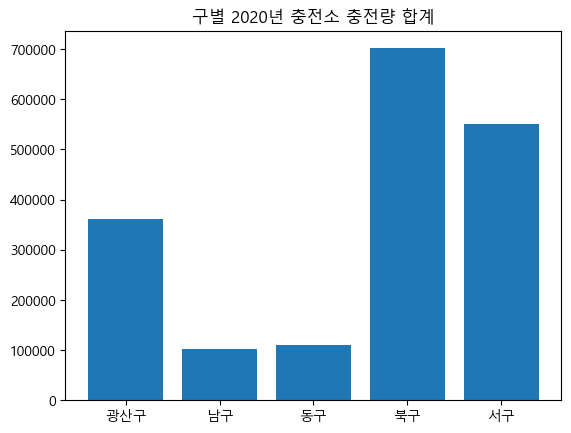

In [66]:
# plt 한글 깨짐 오류
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 구별 충선소 충전량 합계 막대그래프
plt.bar(df_sum['지역(구)'] ,df_sum['충전량'])
plt.title("구별 2020년 충전소 충전량 합계")
plt.show()

In [67]:
# 지도 시각화
import folium
import json
with open('./data/gwangjumap.geojson') as response:
  edge = json.load(response)

m=folium.Map(location=[35.1513, 126.8393], zoom_start=11)
ch = folium.Choropleth(
    geo_data=edge,
    data=df_sum,
    columns=('지역(구)', '충전량'),
    key_on="feature.properties.SIG_KOR_NM", 
).add_to(m)


# 툴팁추가하기 위해 지역별 합계 json 파일에 추가
for i in range(len(edge['features'])):
  try:
    sum = df_sum[df_sum['지역(구)'] == edge['features'][i]['properties']['SIG_KOR_NM']]['충전량'].tolist()[0]
    edge['features'][i]['properties']['sum'] =  sum
  except:
    edge['features'][i]['properties']['sum'] =  None

# 지도에 툴팁 추가    
ch.geojson.add_child(
folium.GeoJsonTooltip(fields=['SIG_KOR_NM', 'sum'], aliases=['지역(구)', '충전량']),
)
m

In [68]:
# 각 구별 용도별 건물정보 불러오기
dong = pd.read_csv('./data/동구_용도별건물정보.csv', encoding='cp949')
seo = pd.read_csv('./data/서구_용도별건물정보.csv', encoding='cp949')
nam = pd.read_csv('./data/남구_용도별건물정보.csv', encoding='cp949')
buk = pd.read_csv('./data/북구_용도별건물정보.csv', encoding='cp949')
gwang = pd.read_csv('./data/광산구_용도별건물정보.csv', encoding='cp949')

In [69]:
# 각 구마다 건뮬용도로 분류된 건물의 총 갯수
dong['건물용도분류명'].value_counts()
seo['건물용도분류명'].value_counts()
nam['건물용도분류명'].value_counts()
buk['건물용도분류명'].value_counts()
gwang['건물용도분류명'].value_counts()

df1=gwang['건물용도분류명'].value_counts().reset_index(name='광산구')
df2=buk['건물용도분류명'].value_counts().reset_index(name='북구')
df3=nam['건물용도분류명'].value_counts().reset_index(name='남구')
df4=seo['건물용도분류명'].value_counts().reset_index(name='서구')
df5=dong['건물용도분류명'].value_counts().reset_index(name='동구')

In [70]:
# 하나의 데이터프레임으로 만들기
merged_df = pd.merge(df1, df2, on='index')
merged_df = pd.merge(merged_df, df3, on='index')
merged_df = pd.merge(merged_df, df4, on='index')
merged_df = pd.merge(merged_df, df5, on='index')

# 열 이름 변경
merged_df = merged_df.rename(columns={'index': '건물용도분류명'})
merged_df

,건물용도분류명,광산구,북구,남구,서구,동구
0,주거용,18026,20937,16176,13029,10278
1,상업용,6340,7763,3613,3877,4543
2,공업용,2977,580,44,46,17
3,문교사회용,882,1139,581,405,489
4,기타,804,521,235,267,97
5,농수산용,332,78,126,47,15
6,공공용,39,15,12,20,4


In [71]:
# 데이터를 각 구별로 보기 위해 행 열 전환하기
merged_df = merged_df.transpose()	#행 열 전환
merged_df.rename(columns=merged_df.iloc[0], inplace=True)	# 행열이 전환된 데이터프레임의 열 이름 제대로 수정
merged_df = merged_df.drop(merged_df.index[0])
merged_df = merged_df.reset_index().rename(columns={'index' : '지역(구)'})
merged_df


,지역(구),주거용,상업용,공업용,문교사회용,기타,농수산용,공공용
0,광산구,18026,6340,2977,882,804,332,39
1,북구,20937,7763,580,1139,521,78,15
2,남구,16176,3613,44,581,235,126,12
3,서구,13029,3877,46,405,267,47,20
4,동구,10278,4543,17,489,97,15,4


In [72]:
# '구'별 충전량과 건물용도별 건물의 갯수 데이터 합치기
sum = pd.merge(df_sum, merged_df)
sum

,지역(구),충전량,주거용,상업용,공업용,문교사회용,기타,농수산용,공공용
0,광산구,360532.640,18026,6340,2977,882,804,332,39
1,남구,101707.100,16176,3613,44,581,235,126,12
2,동구,110213.500,10278,4543,17,489,97,15,4
3,북구,701838.982,20937,7763,580,1139,521,78,15
4,서구,549822.853,13029,3877,46,405,267,47,20


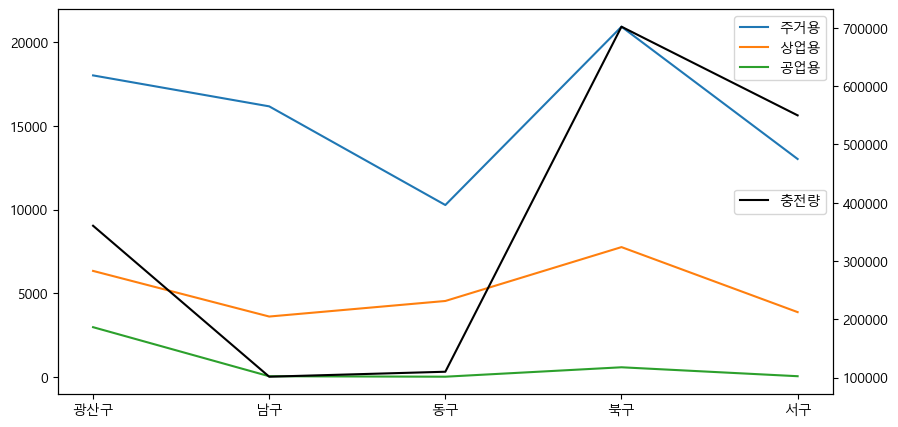

In [73]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(sum['지역(구)'], sum['주거용'], label='주거용')
ax1.plot(sum['지역(구)'], sum['상업용'], label='상업용')
ax1.plot(sum['지역(구)'], sum['공업용'], label='공업용')
ax2.plot(sum['지역(구)'], sum['충전량'],color='black' ,label='충전량')

ax1.legend()
ax2.legend(loc='right')

<AxesSubplot:xlabel='지역(구)'>

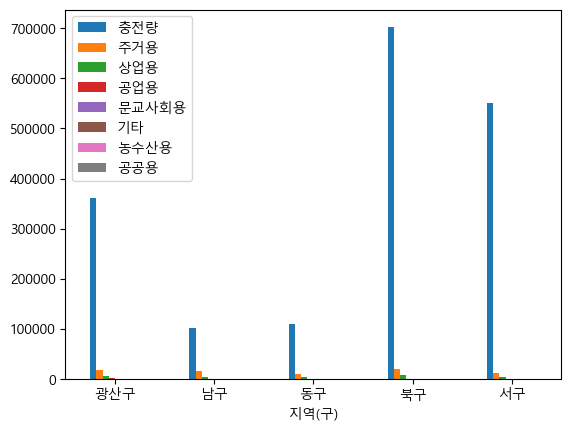

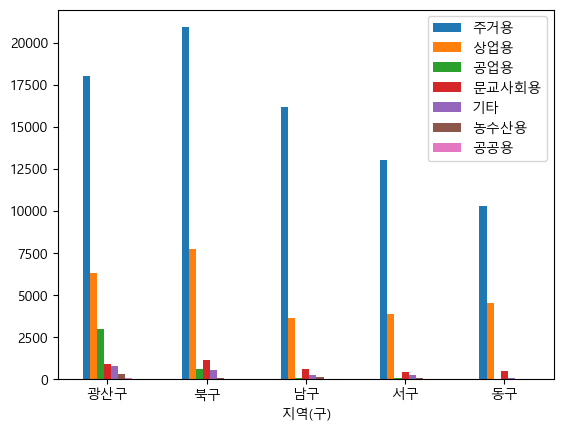

In [74]:
sum.plot.bar(x = '지역(구)', rot=0)
merged_df.plot.bar(x = '지역(구)', rot=0)

In [75]:
# 공영주차장 갯수 데이터 불러오고 확인
juca = pd.read_csv('./data/광주광역시_공영주차장 현황_20210914.csv', encoding='cp949')
juca

,연번,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,장애인,여성,전기충전급속,...,주차기본요금,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,관리기관명,데이터기준일자
0,1,산수1동 제3주차장,공영,노외,광주광역시 동구 경양로 309-6,광주광역시 동구 산수동 489-15,9,0,0,0,...,무료,무료,무료,무료,무료,무료,NaN,NaN,동구청,2021-09-14
1,2,산수도서관 주변,공영,노상,광주광역시 동구 경양로 355,광주광역시 동구 산수1동 401-58,35,0,0,0,...,무료,무료,무료,무료,무료,무료,NaN,NaN,동구청,2021-09-14
2,3,계림동 공영주차장,공영,노외,광주광역시 동구 경양로235번길 4,광주광역시 동구 계림동 489-25,3,0,0,0,...,무료,무료,무료,무료,무료,무료,NaN,NaN,동구청,2021-09-14
3,4,계림동 (거주자 우선),공영,노외,광주광역시 동구 경양로277번길 23-2,광주광역시 동구 계림동 280,80,0,0,0,...,무료,무료,무료,무료,무료,무료,NaN,NaN,동구청,2021-09-14
4,5,충장로상점가 공영주차장,공영,노외,광주광역시 동구 구성로 172-2,광주광역시 동구 충장로5가 25번지,38,0,0,0,...,700,30,350,12시간,NaN,NaN,현금,NaN,동구청,2021-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,336,광산로 제 2공영주차장,공영,부설,광주광역시 광산구 송정동 광산로 48,광주광역시 광산구 송정동 805-4,70,0,0,0,...,무료,15,200,NaN,6400,NaN,현금,NaN,광산구청,2021-09-14
336,337,원동 공영주차장,공영,부설,광주광역시 광산구 송정동 내상로33번길 111,광주광역시 광산구 송정동 679,8,0,0,0,...,무료,무료,무료,무료,무료,무료,NaN,관리인X,광산구청,2021-09-14
337,338,하남산단근로자주차장,공영,부설,광주광역시 광산구 장덕동 하남산단4번로 132,광주광역시 광산구 장덕동 982-10,56,0,0,0,...,무료,무료,무료,무료,무료,무료,NaN,NaN,광산구청,2021-09-14
338,339,송정매일시장상가주차타워,공영,부설,광주광역시 광산구 송정동 내상로 10,광주광역시 광산구 송정동 792-8,213,0,0,0,...,600,30,200,NaN,NaN,NaN,현금,2시간 이상 할증요금 30분당 400원,광산구청,2021-09-14


In [76]:
#소재지지번주소에서 '구' 데이터 추출
juca['지역(구)'] = juca['소재지지번주소'].str.split(' ').str[1]

In [77]:
# '구'별 공영주차장 갯수 구하기
count = juca['지역(구)'].value_counts().reset_index(name='공영주차장 갯수')
count = count.rename(columns={'index' : '지역(구)'})
count

,지역(구),공영주차장 갯수
0,동구,92
1,북구,83
2,서구,70
3,광산구,60
4,남구,35


In [78]:
# 데이터 합치기
sum = pd.merge(sum, count)
sum

,지역(구),충전량,주거용,상업용,공업용,문교사회용,기타,농수산용,공공용,공영주차장 갯수
0,광산구,360532.640,18026,6340,2977,882,804,332,39,60
1,남구,101707.100,16176,3613,44,581,235,126,12,35
2,동구,110213.500,10278,4543,17,489,97,15,4,92
3,북구,701838.982,20937,7763,580,1139,521,78,15,83
4,서구,549822.853,13029,3877,46,405,267,47,20,70


Text(0.5, 1.0, '지역(구)별 공영주차장 갯수')

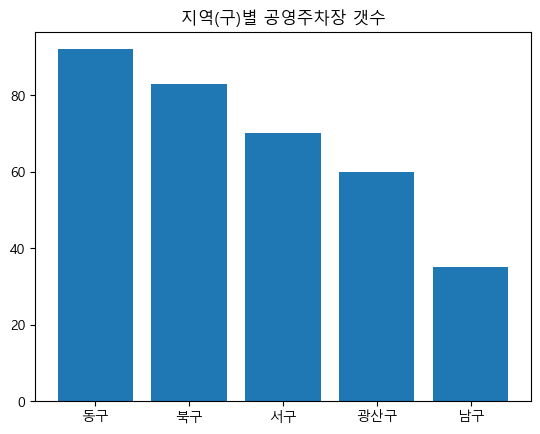

In [82]:
# '구'별 공영주차장의 갯수 막대 그래프 그리기
plt.bar(x=count['지역(구)'], height=count['공영주차장 갯수'])
plt.title('지역(구)별 공영주차장 갯수')

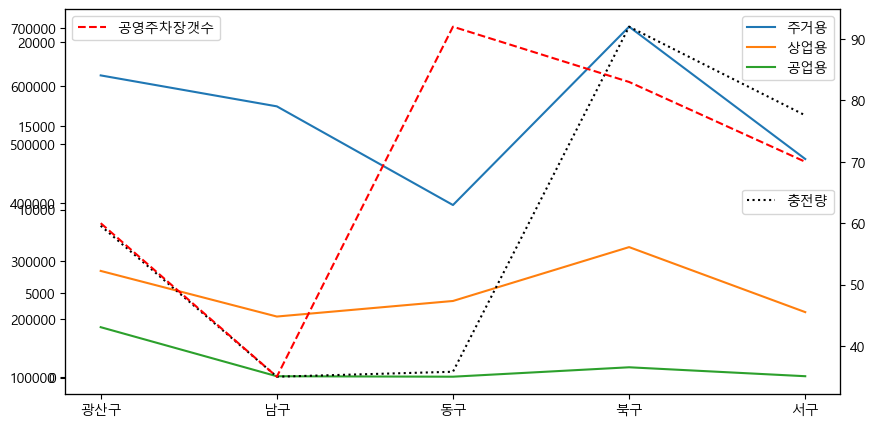

In [ ]:
# 각 구의 데이터의 추이를 보기위한 꺾은선 그래프
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax3 = ax2.twinx()

ax1.plot(sum['지역(구)'], sum['주거용'], label='주거용')
ax1.plot(sum['지역(구)'], sum['상업용'], label='상업용')
ax1.plot(sum['지역(구)'], sum['공업용'], label='공업용')
ax2.plot(sum['지역(구)'], sum['충전량'],color='black', linestyle='dotted' ,label='충전량')
ax3.plot(sum['지역(구)'], sum['공영주차장 갯수'],color='red',linestyle='--' ,label='공영주차장갯수')

ax1.legend()
ax2.legend(loc='right')
ax3.legend(loc='upper left')

In [ ]:
# 상관관계 계산을 위해 지역(구)열을 제외하고 모든 열의 데이터 타입을 변경
sum.set_index('지역(구)', inplace=True)
sum = sum.astype('float')
sum.reset_index(inplace=True)
sum

,지역(구),충전량,용도별합계,주거용,상업용,공업용,문교사회용,기타,농수산용,공공용,공영주차장 갯수
0,광산구,360532.640,29400.0,18026.0,6340.0,2977.0,882.0,804.0,332.0,39.0,60.0
1,남구,101707.100,20787.0,16176.0,3613.0,44.0,581.0,235.0,126.0,12.0,35.0
2,동구,110213.500,15443.0,10278.0,4543.0,17.0,489.0,97.0,15.0,4.0,92.0
3,북구,701838.982,31033.0,20937.0,7763.0,580.0,1139.0,521.0,78.0,15.0,83.0
4,서구,549822.853,17691.0,13029.0,3877.0,46.0,405.0,267.0,47.0,20.0,70.0


In [ ]:
# 상관관계 출력
sum.corr()

,충전량,용도별합계,주거용,상업용,공업용,문교사회용,기타,농수산용,공공용,공영주차장 갯수
충전량,1.000000,0.566173,0.568076,0.637072,0.129326,0.548872,0.454193,-0.025599,0.317285,0.341879
용도별합계,0.566173,1.000000,0.951802,0.875487,0.664172,0.951895,0.882377,0.622511,0.597205,-0.080249
주거용,0.568076,0.951802,1.000000,0.758025,0.460469,0.904153,0.747714,0.496431,0.461534,-0.247143
상업용,0.637072,0.875487,0.758025,1.000000,0.512567,0.948999,0.710316,0.325837,0.348167,0.403446
공업용,0.129326,0.664172,0.460469,0.512567,1.000000,0.499264,0.916547,0.940801,0.902757,-0.142229
문교사회용,0.548872,0.951895,0.904153,0.948999,0.499264,1.000000,0.730808,0.412246,0.349702,0.126130
기타,0.454193,0.882377,0.747714,0.710316,0.916547,0.730808,1.000000,0.860921,0.892506,-0.141688
농수산용,-0.025599,0.622511,0.496431,0.325837,0.940801,0.412246,0.860921,1.000000,0.891610,-0.466935
공공용,0.317285,0.597205,0.461534,0.348167,0.902757,0.349702,0.892506,0.891610,1.000000,-0.299406
공영주차장 갯수,0.341879,-0.080249,-0.247143,0.403446,-0.142229,0.126130,-0.141688,-0.466935,-0.299406,1.000000


<AxesSubplot:>

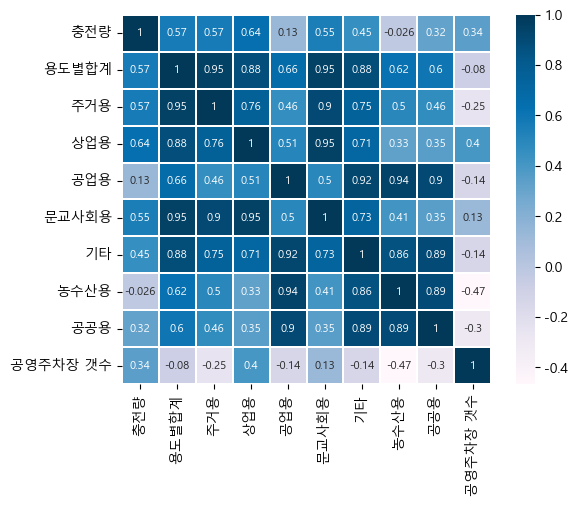

In [ ]:
# 히트맵으로 상관관계 출력 -> 충전량과의 상관관계가 높은 것은 상업용 건물, 주거용 건물, 총 건물의 수, 문교사회용 건물의 순서이다.
import seaborn as sns
colormap = plt.cm.PuBu
sns.heatmap(sum.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})